In [1]:
from sklearn.datasets.samples_generator import make_blobs
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from matplotlib import pyplot

Using TensorFlow backend.


In [2]:
# prepare train and test dataset
def prepare_data():
    # generate 2d classification dataset
    X, Y = make_blobs(n_samples=1000, centers=3, n_features=2,
                     cluster_std=2, random_state=2)
    # one hot encode output variable
    Y = to_categorical(Y)
    # split into train and test
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainY, testY = Y[:n_train], Y[n_train:]
    return trainX, trainY, testX, testY

In [3]:
# fit a model and plot learning curve
def fit_model(trainX, trainY, testX, testY, optimizer):
    # define model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation='relu',
                   kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer,
                 metrics=['accuracy'])
    # fit model
    history = model.fit(trainX, trainY, validation_data=(testX, testY),
                       epochs=200, verbose=0)
    # plot learning curves
    pyplot.plot(history.history['acc'], label='train')
    pyplot.plot(history.history['val_loss'], label='test')
    pyplot.title('opt=' + optimizer, pad=-80)

W1217 05:46:12.817132 13620 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1217 05:46:12.840370 13620 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:529: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1217 05:46:12.846156 13620 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4420: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1217 05:46:12.903795 13620 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1217 05:46:12.946577 13620 deprecation_wrapper.py:119] From C:\Users\Lenovo

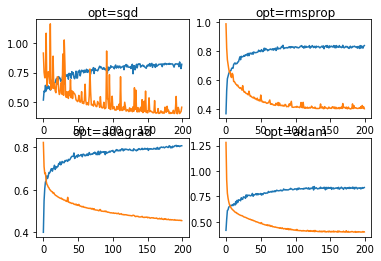

In [4]:
# prepare dataset
trainX, trainY, testX, testY = prepare_data()
# create learning curves for different optimizers
optimizers = ['sgd', 'rmsprop', 'adagrad', 'adam']
for i in range(len(optimizers)):
    # determine the plot number
    plot_no = 220 + (i + 1)
    pyplot.subplot(plot_no)
    # fit model and plot learning curves for an optimizer
    fit_model(trainX, trainY, testX, testY, optimizers[i])
# show learning curves
pyplot.show()